In [22]:
import pandas
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import tkinter as tk
from sko.PSO import PSO
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [23]:
np.random.seed(1)#控制变量

In [24]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
HeartDisease = pandas.read_csv('./processed.cleveland.csv',header=None,names=names)

In [25]:
label = HeartDisease['num']
data = HeartDisease.drop(['num'],axis=1)

In [26]:
clf=SVC(kernel='rbf')#测试不同svm在不同核函数下的性能
acc1  = cross_val_score(clf, data,label, scoring='accuracy',cv=3).mean()#使用三倍交叉验证求准确率，后续同
print(acc1)

0.6171617161716171


In [27]:
clf = SVC(kernel='poly')#测试不同svm在不同核函数下的性能
acc2 = cross_val_score(clf, data, label, scoring='accuracy',cv=3).mean()
print(acc2)

0.6600660066006601


In [28]:
clf = SVC(kernel='sigmoid')#测试不同svm在不同核函数下的性能
acc3 = cross_val_score(clf, data, label, scoring='accuracy',cv=3).mean()
print(acc3)

0.5445544554455446


In [29]:
clf = SVC(kernel='linear')#测试不同svm在不同核函数下的性能
acc4 = cross_val_score(clf, data, label,scoring='accuracy', cv=3).mean()
p4 = cross_val_score(clf, data, label,scoring='precision', cv=3).mean()
r4 = cross_val_score(clf, data, label,scoring='recall', cv=3).mean()
f4 = cross_val_score(clf, data, label,scoring='f1', cv=3).mean()
auc4=cross_val_score(clf, data, label,scoring='roc_auc', cv=3).mean()
print('accuracy=',acc4)
print('precision=',p4)
print('recall=',r4)
print('f1=',f4)
print('auc=',auc4)

accuracy= 0.8283828382838284
precision= 0.8301421255000857
recall= 0.7920135676842429
f1= 0.8078700587786601
auc= 0.9022226582818628


[0.6171617161716171, 0.6600660066006601, 0.5445544554455446, 0.8283828382838284]


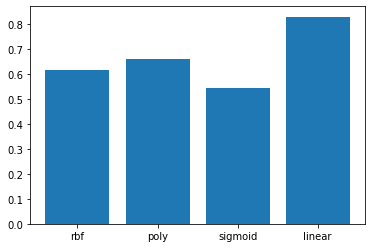

In [30]:
acc=[acc1,acc2,acc3,acc4]
print(acc)
index=['rbf','poly','sigmoid','linear']
plt.bar(x=index,height=acc)
plt.show()


In [31]:
def plots(position):#定义函数用于生成粒子的位置图
    x = []
    y = []
    for i in range(0,len(position)):
        x.append(position[i][0])
        y.append(position[i][1])
    plt.scatter(x, y, alpha = 0.5,c=var.score,cmap='viridis')  #生成散点图，颜色随准对于位置确度变化，透明度设置为0.5
    plt.colorbar()
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.axis([-0.1,1,-1,11])#定义横坐标和纵坐标的范围
    return plt.show()

In [32]:
class var:
    count=0
    bestsocre=0.0
    bestpos=[]
    tu=[]
    score=[]

In [33]:
def func(x):#定义函数，用于计算损失率
    x1,x2=x
    clf = SVC
    socre = cross_val_score(clf(kernel='linear',C=x1, gamma=x2),data, label, cv=3).mean()
    if(socre>var.bestsocre):
        var.bestsocre=socre
        var.bestpos=x
    if var.count%psovar.pop==0:
        print('iter', int(var.count / psovar.pop), 'of', psovar.max_iter)#输出当前轮次
    print(x,socre)
    var.tu.append(x)
    var.score.append(socre)
    if var.count%psovar.pop==psovar.pop-1:#输出每一轮粒子的信息
        print('best position is',var.bestpos,'best score is',var.bestsocre)
        var.bestsocre=0
        plots(var.tu)
        var.score=[]
        var.tu=[]
    var.count+=1
    return 1-socre#返回损失率

In [34]:
class psovar:#pso算法的各种参数
    max_iter=30#迭代次数
    pop=10#粒子数
    n_dim=2#需要求解的维数
    w=0.7#惯性系数，这个数越大，代表着它不容易更改之前的运动路线，更倾向于探索未知领域。
    c1=c2=0.7#个体加速因子，社会加速因子
    lb=[0.001, 0.01]#求解未知数下界
    ub=[1, 10]#求解未知数上界

iter 0 of 30
[0.2052478  8.78239319] 0.834983498349835
[0.02836021 6.70797043] 0.8283828382838284
[0.4178875  5.59131139] 0.834983498349835
[0.14124655 1.98903388] 0.834983498349835
[0.80094382 9.68293314] 0.821782178217822
[0.31411075 6.92630293] 0.8415841584158416
[0.87651276 8.94712057] 0.8250825082508251
[0.08595917 0.40015728] 0.8415841584158416
[0.17066059 8.78264361] 0.834983498349835
[0.09924849 4.21686517] 0.8316831683168316
best position is [0.31411075 6.92630293] best score is 0.8415841584158416


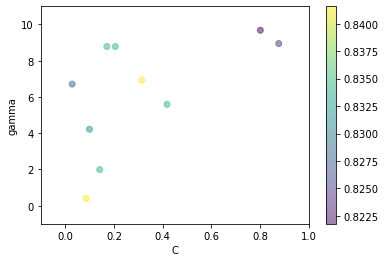

iter 1 of 30
[0.91911403 8.04819754] 0.8250825082508251
[0.42103399 4.08718546] 0.834983498349835
[ 0.60969146 10.        ] 0.8316831683168316
[1.00000000e-03 6.69137115e+00] 0.712871287128713
[ 1. 10.] 0.8283828382838284
[7.00237864e-03 1.00000000e+01] 0.7920792079207922
[0.07858601 7.5908376 ] 0.8415841584158416
[0.74156093 1.11212993] 0.8250825082508251
[1.00000000e-03 1.96742753e+00] 0.712871287128713
[1.0000000e-03 6.7400515e+00] 0.712871287128713
best position is [0.07858601 7.5908376 ] best score is 0.8415841584158416


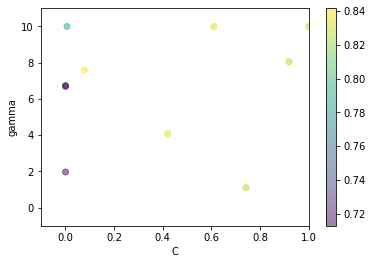

iter 2 of 30
[1.         7.49541224] 0.8283828382838284
[0.68522596 2.51627141] 0.8283828382838284
[ 0.66004141 10.        ] 0.8283828382838284
[1.00000000e-03 9.99091282e+00] 0.712871287128713
[1.         9.25780551] 0.8283828382838284
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 6.64143952e+00] 0.712871287128713
[1.         4.24702896] 0.8283828382838284
[0.001     0.5302222] 0.712871287128713
[1.00000000e-03 8.80034662e+00] 0.712871287128713
best position is [1.         7.49541224] best score is 0.8283828382838284


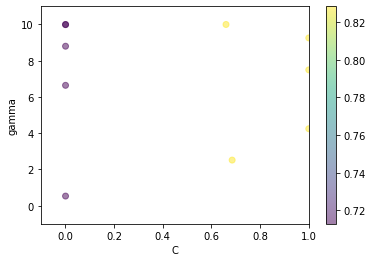

iter 3 of 30
[1.         7.14966194] 0.8283828382838284
[0.39872119 5.48430616] 0.8382838283828383
[ 0.46131049 10.        ] 0.8316831683168316
[1.e-03 1.e+01] 0.712871287128713
[0.94948124 8.13360914] 0.8250825082508251
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 6.41426818e+00] 0.712871287128713
[0.63646359 6.8486304 ] 0.8283828382838284
[1.0000000e-03 1.1051003e+00] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
best position is [0.39872119 5.48430616] best score is 0.8382838283828383


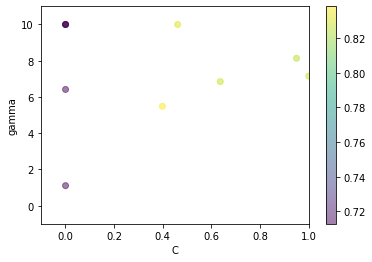

iter 4 of 30
[0.87887851 7.27751461] 0.8250825082508251
[0.06265422 8.7841233 ] 0.8382838283828383
[0.16984293 8.942074  ] 0.834983498349835
[1.00000000e-03 7.87771771e+00] 0.712871287128713
[0.46803289 8.18709938] 0.8316831683168316
[1.00000000e-03 8.94868082e+00] 0.712871287128713
[1.00000000e-03 7.02507587e+00] 0.712871287128713
[0.13375407 8.13877719] 0.8382838283828383
[1.00000000e-03 3.92709985e+00] 0.712871287128713
[1.0000000e-03 8.2185332e+00] 0.712871287128713
best position is [0.06265422 8.7841233 ] best score is 0.8382838283828383


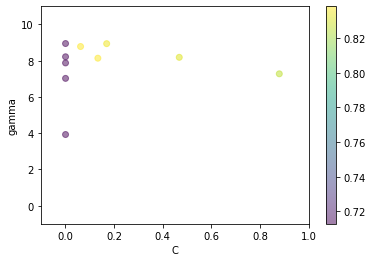

iter 5 of 30
[0.73603628 7.58428551] 0.8250825082508251
[3.35934811e-03 9.12975486e+00] 0.7623762376237625
[1.00000000e-03 7.95832648e+00] 0.712871287128713
[1.00000000e-03 6.06878662e+00] 0.712871287128713
[1.0000000e-03 7.9204431e+00] 0.712871287128713
[1.00000000e-03 8.70028205e+00] 0.712871287128713
[1.00000000e-03 7.93885416e+00] 0.712871287128713
[1.00000000e-03 8.95225549e+00] 0.712871287128713
[1.00000000e-03 7.00465902e+00] 0.712871287128713
[1.00000000e-03 6.54719312e+00] 0.712871287128713
best position is [0.73603628 7.58428551] best score is 0.8250825082508251


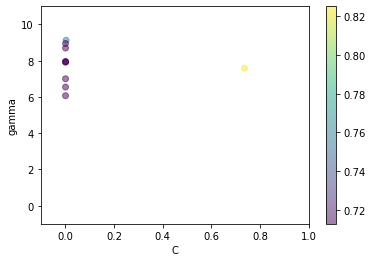

iter 6 of 30
[0.37394991 7.74837336] 0.8415841584158416
[0.04050902 7.02391232] 0.8415841584158416
[1.00000000e-03 7.54945677e+00] 0.712871287128713
[1.00000000e-03 4.96189103e+00] 0.712871287128713
[1.00000000e-03 7.86431847e+00] 0.712871287128713
[6.61327829e-03 8.18121509e+00] 0.7854785478547855
[0.02048265 8.40508635] 0.8118811881188118
[1.00000000e-03 8.60752242e+00] 0.712871287128713
[0.02371204 5.74388787] 0.8184818481848186
[1.00000000e-03 5.82143301e+00] 0.712871287128713
best position is [0.37394991 7.74837336] best score is 0.8415841584158416


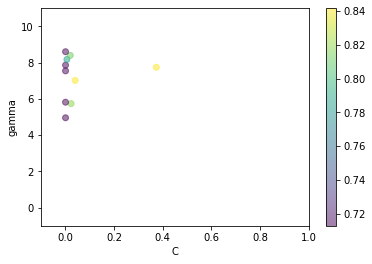

iter 7 of 30
[0.03183948 7.77236714] 0.8283828382838285
[0.08321235 5.60673965] 0.8415841584158416
[0.06782123 7.29528857] 0.8415841584158416
[1.00000000e-03 5.59392633e+00] 0.712871287128713
[0.27484884 7.86974446] 0.8382838283828383
[0.04864592 7.75841916] 0.8415841584158416
[0.08193318 8.41145196] 0.8415841584158416
[1.0000000e-03 7.7625053e+00] 0.712871287128713
[0.0578178  5.89972969] 0.8382838283828383
[1.00000000e-03 6.97784039e+00] 0.712871287128713
best position is [0.08321235 5.60673965] best score is 0.8415841584158416


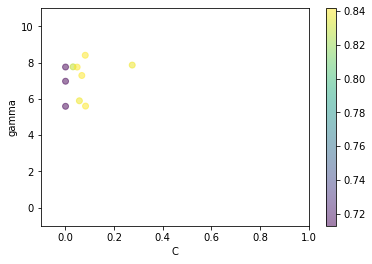

iter 8 of 30
[0.02347124 7.70743847] 0.8184818481848186
[0.08880704 5.38366416] 0.8382838283828383
[0.11999801 7.30170868] 0.8382838283828383
[1.00000000e-03 6.89932508e+00] 0.712871287128713
[0.42175725 7.70574043] 0.834983498349835
[0.0897742  7.38149339] 0.8382838283828383
[0.12196836 7.87657764] 0.834983498349835
[0.09673975 7.24009997] 0.8316831683168316
[0.09007656 6.377499  ] 0.8382838283828383
[0.02878063 8.11953935] 0.8283828382838284
best position is [0.08880704 5.38366416] best score is 0.8382838283828383


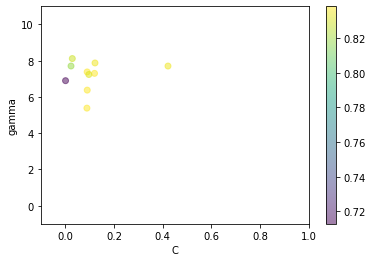

iter 9 of 30
[0.06555452 7.64522953] 0.8382838283828383
[0.08191111 7.39375126] 0.8415841584158416
[0.13890586 7.50282947] 0.834983498349835
[0.0311505  8.11541184] 0.8316831683168316
[0.3214911 7.5967346] 0.8415841584158416
[0.10979902 7.27015262] 0.8316831683168316
[0.10900397 7.24036063] 0.8316831683168316
[0.16988006 7.60344156] 0.834983498349835
[0.08862031 6.62966535] 0.8382838283828383
[0.04860669 8.63809649] 0.8415841584158416
best position is [0.08191111 7.39375126] best score is 0.8415841584158416


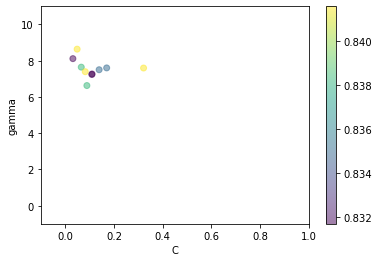

iter 10 of 30
[0.27668765 7.59156684] 0.8382838283828383
[0.05579372 8.68201716] 0.8382838283828383
[0.095683   7.53249454] 0.8316831683168316
[0.0593515  8.68492418] 0.8382838283828383
[0.19882529 7.51740376] 0.834983498349835
[0.07200327 7.46378529] 0.8448844884488449
[0.08102512 6.98574294] 0.8415841584158416
[0.20503853 8.06450393] 0.834983498349835
[0.07293022 6.70073563] 0.8448844884488449
[0.07664102 8.41478532] 0.8415841584158416
best position is [0.07200327 7.46378529] best score is 0.8448844884488449


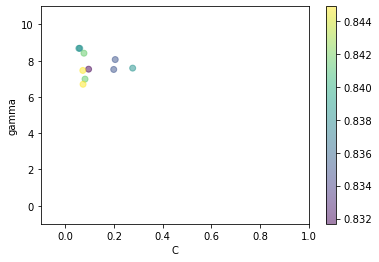

iter 11 of 30
[0.41072932 7.56599117] 0.834983498349835
[0.0365918  9.34516338] 0.8415841584158416
[0.03620792 7.50411695] 0.8415841584158416
[0.08379218 8.66121361] 0.8415841584158416
[0.11932133 7.48749529] 0.8382838283828383
[0.04554624 7.59932816] 0.8415841584158416
[0.05876864 7.05215028] 0.8415841584158416
[0.18307939 8.10522744] 0.834983498349835
[0.061878   7.27698617] 0.8382838283828383
[0.09458819 8.00798524] 0.8316831683168316
best position is [0.0365918  9.34516338] best score is 0.8415841584158416


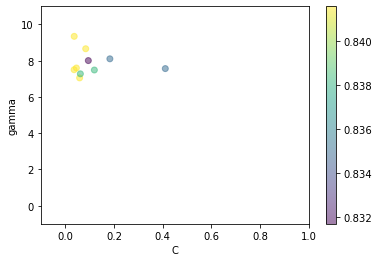

iter 12 of 30
[0.28162958 7.62783392] 0.8382838283828383
[0.02810989 7.91497716] 0.8283828382838284
[0.00829875 7.45876828] 0.7887788778877889
[0.09641832 8.40429456] 0.8316831683168316
[0.16223201 7.50125374] 0.8382838283828383
[0.05148793 7.58939725] 0.8382838283828383
[0.05262653 7.5170794 ] 0.8382838283828383
[0.07740039 7.95670068] 0.8415841584158416
[0.05970071 7.48734354] 0.8382838283828383
[0.1035495  7.88702234] 0.8316831683168316
best position is [0.07740039 7.95670068] best score is 0.8415841584158416


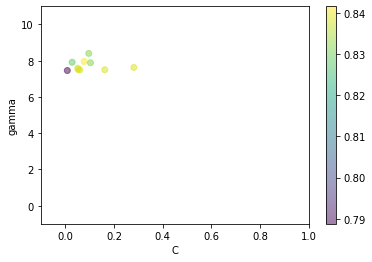

iter 13 of 30
[0.13110165 7.69012694] 0.8382838283828383
[0.05501809 6.43990877] 0.8382838283828383
[2.85548098e-03 7.33324811e+00] 0.7524752475247526
[0.08771995 8.02686019] 0.8382838283828383
[0.19838908 7.56332322] 0.834983498349835
[0.07442811 7.47376891] 0.8415841584158416
[0.05533095 7.88653876] 0.8382838283828383
[1.00000000e-03 7.75121554e+00] 0.712871287128713
[0.06782957 7.62729172] 0.8415841584158416
[0.07786907 8.04302164] 0.8415841584158416
best position is [0.07442811 7.47376891] best score is 0.8415841584158416


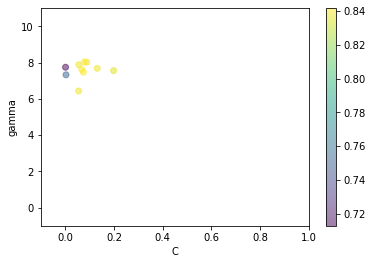

iter 14 of 30
[0.05596919 7.63147981] 0.8382838283828383
[0.07269544 6.22141456] 0.8448844884488449
[0.0515443  7.28455311] 0.8382838283828383
[0.07343    8.02477379] 0.8448844884488449
[0.25978793 7.58609743] 0.8382838283828383
[0.08833265 7.38555822] 0.8382838283828383
[0.07069738 7.92614491] 0.8448844884488449
[1.00000000e-03 7.65654891e+00] 0.712871287128713
[0.07735598 7.09044156] 0.8415841584158416
[0.03886834 8.1262836 ] 0.8415841584158416
best position is [0.07269544 6.22141456] best score is 0.8448844884488449


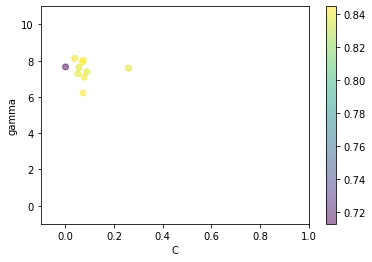

iter 15 of 30
[0.11363856 7.60771402] 0.8382838283828383
[0.08475992 6.56040205] 0.8415841584158416
[0.09624008 7.30613725] 0.8316831683168316
[0.06282854 7.68953697] 0.8382838283828383
[0.22246031 7.55695524] 0.8382838283828383
[0.08583318 7.35526172] 0.8415841584158416
[0.08236008 7.93671745] 0.8415841584158416
[0.03174993 7.66633518] 0.8316831683168316
[0.08323516 6.74926323] 0.8415841584158416
[0.01940631 8.3923192 ] 0.8118811881188118
best position is [0.08475992 6.56040205] best score is 0.8415841584158416


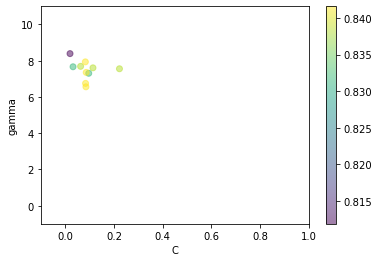

iter 16 of 30
[0.20531043 7.53850595] 0.834983498349835
[0.0771206  6.99695647] 0.8415841584158416
[0.10010205 7.40284489] 0.8316831683168316
[0.06518381 7.45464436] 0.8382838283828383
[0.19747011 7.53783167] 0.834983498349835
[0.08228526 7.46149915] 0.8415841584158416
[0.0825233  7.79273038] 0.8415841584158416
[0.11003716 7.61023973] 0.8316831683168316
[0.08040694 6.64387255] 0.8415841584158416
[0.02010921 8.33781515] 0.8151815181518152
best position is [0.0771206  6.99695647] best score is 0.8415841584158416


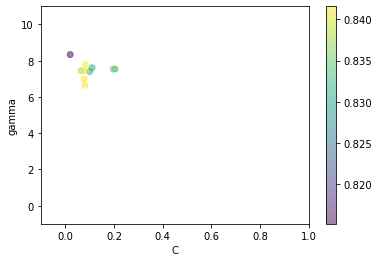

iter 17 of 30
[0.2625017  7.44349348] 0.8382838283828383
[0.0687845  7.27200993] 0.8415841584158416
[0.07029748 7.48425352] 0.8448844884488449
[0.07190001 7.29845739] 0.8448844884488449
[0.16580834 7.53429999] 0.834983498349835
[0.0729626  7.53673137] 0.8448844884488449
[0.07307465 7.75183907] 0.8448844884488449
[0.14326847 7.65143698] 0.834983498349835
[0.07222789 6.79322317] 0.8448844884488449
[0.04276601 8.07760035] 0.8415841584158416
best position is [0.07029748 7.48425352] best score is 0.8448844884488449


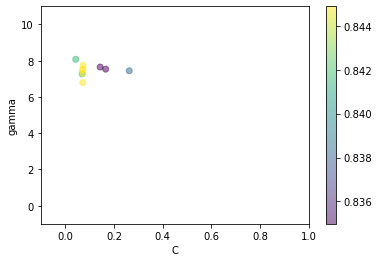

iter 18 of 30
[0.30352498 7.55178354] 0.8415841584158416
[0.06525756 7.31161542] 0.8382838283828383
[0.05047677 7.53183766] 0.8415841584158416
[0.07670058 7.65204606] 0.8415841584158416
[0.21335537 7.53903804] 0.8382838283828383
[0.0658786  7.54049331] 0.8382838283828383
[0.06574642 7.72320335] 0.8382838283828383
[0.13401091 7.73551038] 0.8382838283828383
[0.06640675 7.25355065] 0.8415841584158416
[0.06160532 7.92869989] 0.8382838283828383
best position is [0.30352498 7.55178354] best score is 0.8415841584158416


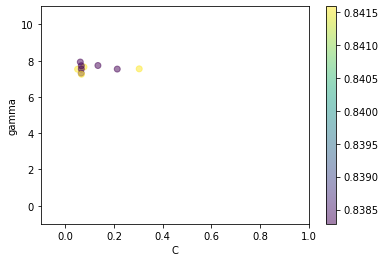

iter 19 of 30
[0.28289378 7.62397484] 0.8382838283828383
[0.06995266 6.74772347] 0.8448844884488449
[0.05066998 7.53375652] 0.8415841584158416
[0.07775381 8.03097559] 0.8415841584158416
[0.22788377 7.53976925] 0.8382838283828383
[0.0627483  7.48757674] 0.8382838283828383
[0.06577838 7.60295913] 0.8382838283828383
[0.0501615  7.76010106] 0.8415841584158416
[0.06843826 7.32270987] 0.8415841584158416
[0.07484531 8.1023951 ] 0.8415841584158416
best position is [0.06995266 6.74772347] best score is 0.8448844884488449


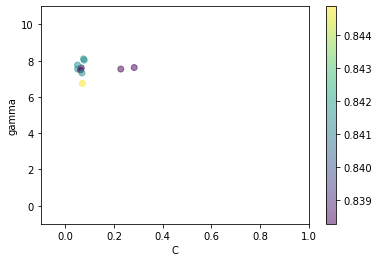

iter 20 of 30
[0.27834107 7.64730686] 0.8382838283828383
[0.07448139 6.17176156] 0.8415841584158416
[0.06580226 7.4912777 ] 0.8382838283828383
[0.07286003 7.99774755] 0.8448844884488449
[0.24919446 7.51551264] 0.8382838283828383
[0.06990655 7.42964264] 0.8448844884488449
[0.06876627 7.66032906] 0.8415841584158416
[0.01155811 7.69528589] 0.8019801980198021
[0.07325252 7.27103033] 0.8448844884488449
[0.07699251 8.01420039] 0.8415841584158416
best position is [0.07286003 7.99774755] best score is 0.8448844884488449


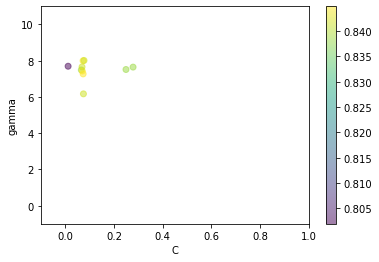

iter 21 of 30
[0.19      7.6560101] 0.834983498349835
[0.07635635 6.5900292 ] 0.8415841584158416
[0.07817593 7.44365792] 0.8415841584158416
[0.0693301  7.67066576] 0.8448844884488449
[0.21805297 7.50484934] 0.8382838283828383
[0.0763775  7.41451375] 0.8415841584158416
[0.07394765 7.70967833] 0.8415841584158416
[0.03789727 7.5316774 ] 0.8415841584158416
[0.07598716 6.90448488] 0.8415841584158416
[0.07093586 8.20308473] 0.8448844884488449
best position is [0.0693301  7.67066576] best score is 0.8448844884488449


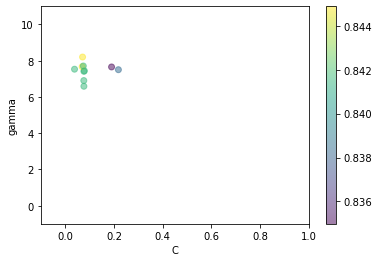

iter 22 of 30
[0.18358861 7.59194941] 0.834983498349835
[0.07375986 7.20276302] 0.8448844884488449
[0.08335964 7.44786003] 0.8415841584158416
[0.06785086 7.59260551] 0.8415841584158416
[0.18172407 7.51491117] 0.834983498349835
[0.07863458 7.4545237 ] 0.8415841584158416
[0.07694898 7.62031968] 0.8415841584158416
[0.09007981 7.57658227] 0.8382838283828383
[0.07523849 6.72252159] 0.8415841584158416
[0.06678453 7.90214938] 0.8415841584158416
best position is [0.07375986 7.20276302] best score is 0.8448844884488449


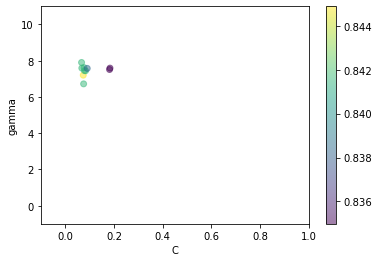

iter 23 of 30
[0.16556894 7.48516533] 0.8382838283828383
[0.07159342 7.22028666] 0.8448844884488449
[0.07845546 7.4746681 ] 0.8415841584158416
[0.06963507 7.70776197] 0.8448844884488449
[0.17534137 7.50688465] 0.834983498349835
[0.07640828 7.48628353] 0.8415841584158416
[0.07297016 7.72385105] 0.8448844884488449
[0.1167753  7.66486289] 0.8382838283828383
[0.0726964  6.69991448] 0.8448844884488449
[0.06963308 7.58177481] 0.8448844884488449
best position is [0.07159342 7.22028666] best score is 0.8448844884488449


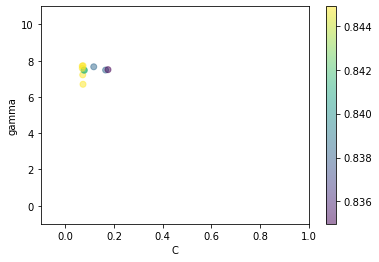

iter 24 of 30
[0.13431906 7.48198512] 0.8382838283828383
[0.07057144 7.08653973] 0.8448844884488449
[0.06837949 7.4966309 ] 0.8415841584158416
[0.07283184 7.80608278] 0.8415841584158416
[0.19329682 7.51639266] 0.834983498349835
[0.07288807 7.49851673] 0.8448844884488449
[0.06858739 7.78956245] 0.8415841584158416
[0.10021432 7.80953247] 0.8316831683168316
[0.07055436 7.20463751] 0.8448844884488449
[0.07331804 7.67857117] 0.8448844884488449
best position is [0.07057144 7.08653973] best score is 0.8448844884488449


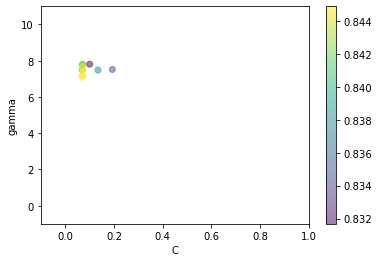

iter 25 of 30
[0.14504857 7.48402653] 0.834983498349835
[0.07135673 6.66513235] 0.8448844884488449
[0.06282705 7.48669463] 0.8382838283828383
[0.07466425 7.87942128] 0.8415841584158416
[0.21612603 7.54273318] 0.8382838283828383
[0.06950539 7.483016  ] 0.8448844884488449
[0.0669687  7.88376628] 0.8415841584158416
[0.07649419 7.9705    ] 0.8415841584158416
[0.07011076 7.40904871] 0.8448844884488449
[0.07336827 7.9587697 ] 0.8448844884488449
best position is [0.07135673 6.66513235] best score is 0.8448844884488449


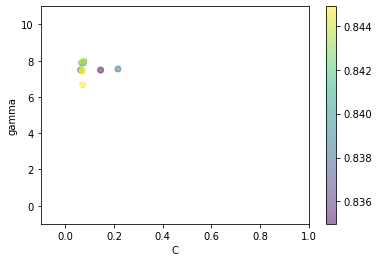

iter 26 of 30
[0.24493318 7.65601843] 0.8382838283828383
[0.07216719 6.22204807] 0.8448844884488449
[0.06255058 7.4792162 ] 0.8382838283828383
[0.07473568 7.93379664] 0.8415841584158416
[0.23680023 7.52897108] 0.8382838283828383
[0.06794185 7.46588098] 0.8415841584158416
[0.06972045 7.8548589 ] 0.8448844884488449
[0.0582356  7.90483892] 0.8382838283828383
[0.0718817  7.54860539] 0.8448844884488449
[0.07225024 8.2563833 ] 0.8448844884488449
best position is [0.07216719 6.22204807] best score is 0.8448844884488449


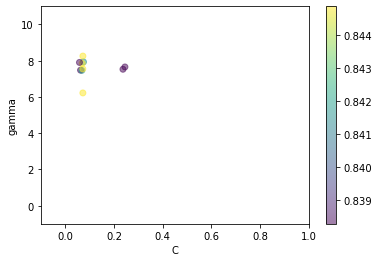

iter 27 of 30
[0.35629432 7.68188583] 0.8415841584158416
[0.07299038 6.16325544] 0.8448844884488449
[0.07205731 7.46713456] 0.8448844884488449
[0.07355781 7.82164747] 0.8448844884488449
[0.20782403 7.53418999] 0.8382838283828383
[0.06918297 7.45312044] 0.8448844884488449
[0.07193903 7.66196328] 0.8415841584158416
[0.05997818 7.79550727] 0.8382838283828383
[0.07331797 7.15010329] 0.8448844884488449
[0.07121276 8.30036868] 0.8448844884488449
best position is [0.07299038 6.16325544] best score is 0.8448844884488449


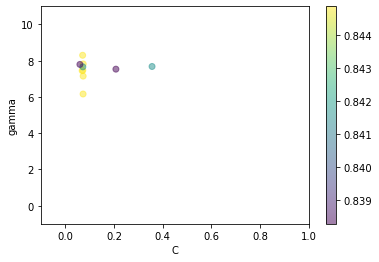

iter 28 of 30
[0.4258996  7.64306452] 0.834983498349835
[0.0732262  6.83717785] 0.8448844884488449
[0.07800335 7.46318064] 0.8415841584158416
[0.07255406 7.8191313 ] 0.8415841584158416
[0.16950736 7.55392167] 0.834983498349835
[0.07122252 7.4531161 ] 0.8448844884488449
[0.07327729 7.53364446] 0.8448844884488449
[0.08056594 7.58213271] 0.8415841584158416
[0.07336792 6.8486296 ] 0.8448844884488449
[0.07052619 7.89011346] 0.8448844884488449
best position is [0.0732262  6.83717785] best score is 0.8448844884488449


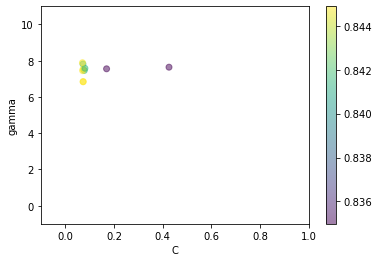

iter 29 of 30
[0.22043839 7.57890168] 0.8382838283828383
[0.07289001 7.18507342] 0.8448844884488449
[0.07788467 7.4666444 ] 0.8415841584158416
[0.07175915 7.71395312] 0.8448844884488449
[0.09936015 7.56956595] 0.8316831683168316
[0.07331927 7.46123259] 0.8448844884488449
[0.07219445 7.64921136] 0.8448844884488449
[0.09241368 7.58916825] 0.834983498349835
[0.07240972 6.90029934] 0.8448844884488449
[0.07124811 7.5384635 ] 0.8448844884488449
best position is [0.07289001 7.18507342] best score is 0.8448844884488449


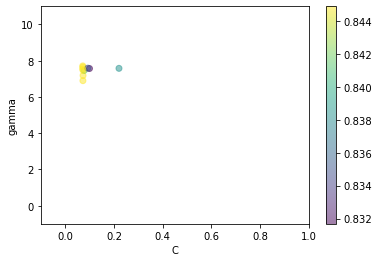

iter 30 of 30
[0.09735916 7.62823169] 0.8316831683168316
[0.07244783 7.16656846] 0.8415841584158416
[0.0765003  7.48016522] 0.8415841584158416
[0.07223065 7.63326619] 0.8448844884488449
[0.07158428 7.52401792] 0.8448844884488449
[0.07452579 7.46973776] 0.8415841584158416
[0.07064998 7.77031653] 0.8448844884488449
[0.08502399 7.71409504] 0.8415841584158416
[0.0719375  7.22149229] 0.8448844884488449
[0.07187002 7.30346475] 0.8448844884488449
best position is [0.07223065 7.63326619] best score is 0.8448844884488449


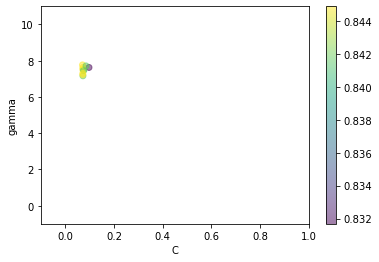

best_C and best_gamma is  [0.07200327 7.46378529] best_cost is [0.15511551]


In [35]:
pso = PSO(func=func, n_dim=psovar.n_dim, pop=psovar.pop, max_iter=psovar.max_iter, lb=psovar.lb, ub=psovar.ub, w=psovar.w, c1=psovar.c1, c2=psovar.c2)
pso.record_mode = True #记录粒子的历史位置
pso.run()#运行算法
print('best_C and best_gamma is ', pso.gbest_x, 'best_cost is', pso.gbest_y)

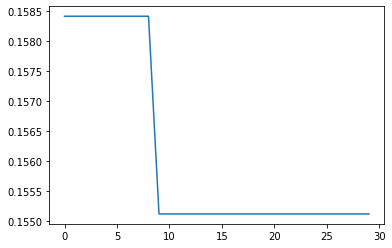

In [36]:
plt.plot(pso.gbest_y_hist)#绘制每一论损失率的折线图
plt.show()

In [37]:
clf=SVC(kernel='linear',C=pso.gbest_x[0],gamma=pso.gbest_x[1],probability=True)#在pso算法找到的最优位置上测试svm的准确率
acc = cross_val_score(clf, data, label,scoring='accuracy', cv=3).mean()
p = cross_val_score(clf, data, label,scoring='precision', cv=3).mean()
r = cross_val_score(clf, data, label,scoring='recall', cv=3).mean()
f = cross_val_score(clf, data, label,scoring='f1', cv=3).mean()
auc=cross_val_score(clf, data, label,scoring='roc_auc', cv=3).mean()
print(acc)
print(p)
print(r)
print(f)
print(auc)

0.8448844884488449
0.8560052673424767
0.7991057662658032
0.8248058309102736
0.8973511453314106


In [38]:
t=cross_val_predict(clf, data, label, cv=3, method='predict_proba')
t

array([[0.69830863, 0.30169137],
       [0.0200938 , 0.9799062 ],
       [0.0476603 , 0.9523397 ],
       [0.76793891, 0.23206109],
       [0.93284862, 0.06715138],
       [0.9598888 , 0.0401112 ],
       [0.3523893 , 0.6476107 ],
       [0.86230038, 0.13769962],
       [0.22882421, 0.77117579],
       [0.14883054, 0.85116946],
       [0.48379853, 0.51620147],
       [0.89353001, 0.10646999],
       [0.26317894, 0.73682106],
       [0.82817719, 0.17182281],
       [0.44236201, 0.55763799],
       [0.85001077, 0.14998923],
       [0.79656584, 0.20343416],
       [0.73293967, 0.26706033],
       [0.85741639, 0.14258361],
       [0.92667588, 0.07332412],
       [0.88790106, 0.11209894],
       [0.95218599, 0.04781401],
       [0.89375437, 0.10624563],
       [0.2261934 , 0.7738066 ],
       [0.03521615, 0.96478385],
       [0.90690204, 0.09309796],
       [0.96591825, 0.03408175],
       [0.78647841, 0.21352159],
       [0.65385624, 0.34614376],
       [0.08476386, 0.91523614],
       [0.

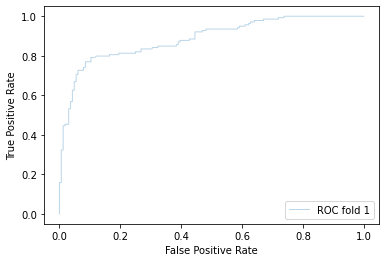

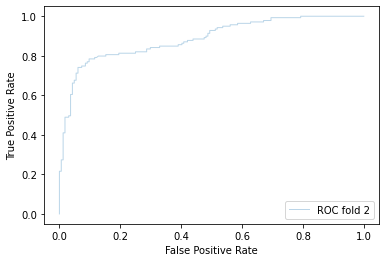

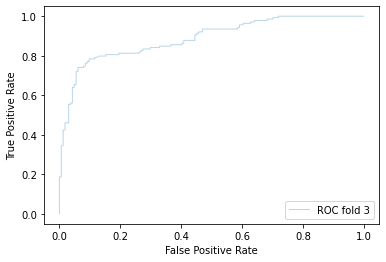

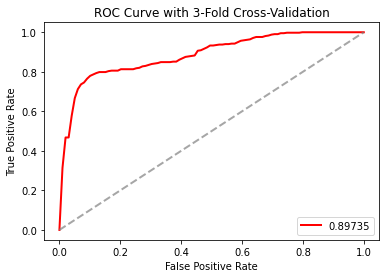

In [39]:
# 通过交叉验证获取预测得分并绘制 ROC 曲线
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cv = 3

for i in range(cv):
    y_pred = cross_val_predict(clf, data, label, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(label, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(alpha=0.3, lw=1, name='ROC fold {}'.format(i + 1))
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc_score(label, y_pred))
    plt.show()

# 绘制平均 ROC 曲线
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='r', label='0.89735', lw=2)

# 绘制对角线
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', alpha=.7)

# 设置图形样式
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 3-Fold Cross-Validation')
plt.legend(loc="lower right")
plt.show()

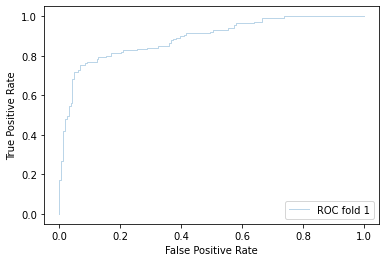

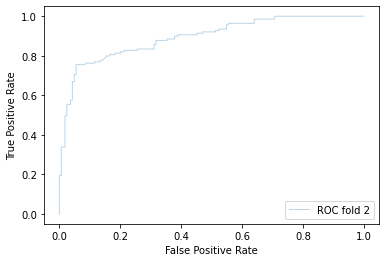

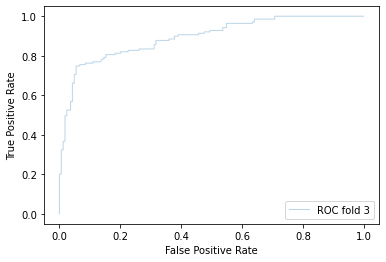

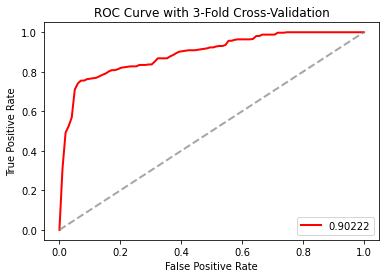

In [40]:
clf0=SVC(kernel='linear',probability=True)
# 通过交叉验证获取预测得分并绘制 ROC 曲线
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
cv = 3

for i in range(cv):
    y_pred = cross_val_predict(clf0, data, label, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(label, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(alpha=0.3, lw=1, name='ROC fold {}'.format(i + 1))
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc_score(label, y_pred))
    plt.show()

# 绘制平均 ROC 曲线
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='r', label='0.90222'.format(mean_auc, std_auc), lw=2)

# 绘制对角线
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', alpha=.7)

# 设置图形样式
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 3-Fold Cross-Validation')
plt.legend(loc="lower right")
plt.show()

In [41]:
import tkinter as tk
from tkinter import messagebox

root = tk.Tk()

# 设置窗口大小
root.geometry("300x200")

# 模拟准确率
original_accuracy = acc4
updated_accuracy = acc

# 创建一个 Label 控件，用于显示准确率信息
accuracy_label = tk.Label(root, text="优化前准确率: {:.3f}%\n粒子群算法优化后准确率: {:.3f}%".format(original_accuracy * 100, updated_accuracy * 100))
accuracy_label.pack(pady=50)

# 创建一个函数，用于在单击按钮时执行并关闭窗口
def confirm():
    root.destroy()

# 创建一个 Button 控件，用于确认准确率信息
confirm_button = tk.Button(root, text="Confirm", command=confirm)
confirm_button.pack()

# 将窗口移动到屏幕中心
root.update_idletasks()
width = root.winfo_width()
height = root.winfo_height()
x = (root.winfo_screenwidth() // 2) - (width // 2)
y = (root.winfo_screenheight() // 2) - (height // 2)
root.geometry('{}x{}+{}+{}'.format(width, height, x, y))

root.mainloop()
